In [1]:
%matplotlib inline

import pandas as pd
import itertools as it

from pandas import DataFrame

from sklearn.decomposition import PCA

import matplotlib.cm as cm

from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn import decomposition
from sklearn import datasets

from copy import deepcopy
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
stars_filepath = 'review_stars_rest_subset.txt'
review_txt_filepath = 'review_text_rest_subset.txt'
business_filepath = 'review_business_rest_subset.txt'
user_filepath = 'review_user_rest_subset.txt'

In [6]:
with open(business_filepath) as f:
    business = f.readlines()
# remove whitespace characters like `\n` at the end of each line
business = [x.strip() for x in business]

In [7]:
all_bus_filepath = "collapsed_business_rest_subset.txt"

In [8]:
with open(all_bus_filepath) as f:
    all_bus = f.readlines()
# remove whitespace characters like `\n` at the end of each line
all_bus = [x.strip() for x in all_bus]

In [9]:
len(all_bus)

52810

In [10]:
bus_set = frozenset(business)
print(len(bus_set))

52810


In [11]:
lda_file = 'output_file_test_minimal_codecs_substr_b.txt'

In [12]:
lda_read = pd.io.parsers.read_csv(lda_file,sep=",", header=None)
len(lda_read)

52810

In [13]:
business_id = list(bus_set)[0:len(lda_read)]
len(business_id)

52810

In [150]:
bus_end = all_bus[len(lda_read):len(bus_set)]

In [151]:
len(bus_end)

7534

In [154]:
text_file = open("collapsed_business_end.txt", "w")
for line in bus_end:
    text_file.write(str(line + '\n'))
text_file.close()

subset user datafile for top 20,000 users

In [156]:
all_user_filepath = "collapsed_user_rest_subset.txt"

In [157]:
with open(all_user_filepath) as f:
    all_user = f.readlines()
# remove whitespace characters like `\n` at the end of each line
all_user = [x.strip() for x in all_user]

In [158]:
len(all_user)

169373

In [159]:
user_sub = all_user[0:20000]

In [160]:
text_file = open("collapsed_user_20000.txt", "w")
for line in user_sub:
    text_file.write(str(line + '\n'))
text_file.close()

In [14]:
lda_read.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0000,0.0000,0.0000,0.0623,0.0,0.0,0.0000,0.0000,0.0,0.0000,...,0.0000,0.000,0.0,0.0171,0.0276,0.0000,0.0593,0.0886,0.0,0.1217
1,0.2733,0.1195,0.1067,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0461,...,0.0000,0.044,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
2,0.0000,0.0221,0.1126,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0190,...,0.0000,0.000,0.0,0.0000,0.0214,0.0000,0.0000,0.0279,0.0,0.0601
3,0.0000,0.0140,0.0000,0.0000,0.0,0.0,0.0412,0.0468,0.0,0.0116,...,0.0000,0.000,0.0,0.0000,0.0281,0.1107,0.0000,0.0156,0.0,0.0000
4,0.0000,0.1261,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0668,...,0.2102,0.000,0.0,0.0000,0.0138,0.0000,0.0165,0.0000,0.0,0.1548


In [15]:
lda_read.insert(0, 'business_id',business_id)

In [16]:
lda_read.head()

,business_id,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,xFCfqtyoIfFSMJbL39jnEw,0.0000,0.0000,0.0000,0.0623,0.0,0.0,0.0000,0.0000,0.0,...,0.0000,0.000,0.0,0.0171,0.0276,0.0000,0.0593,0.0886,0.0,0.1217
1,x4aHNNo1osWNCB75q_PijQ,0.2733,0.1195,0.1067,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,0.0000,0.044,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
2,rIeXMt92PLNjZbemWKRXcA,0.0000,0.0221,0.1126,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,0.0000,0.000,0.0,0.0000,0.0214,0.0000,0.0000,0.0279,0.0,0.0601
3,gauRTVjB0ocZp3YARH0SOg,0.0000,0.0140,0.0000,0.0000,0.0,0.0,0.0412,0.0468,0.0,...,0.0000,0.000,0.0,0.0000,0.0281,0.1107,0.0000,0.0156,0.0,0.0000
4,7FLmfV1Ena0xE0Ew82C2Xg,0.0000,0.1261,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,0.2102,0.000,0.0,0.0000,0.0138,0.0000,0.0165,0.0000,0.0,0.1548


In [17]:
topic_names = {0: u'chinese',
               1: u'thai',
               2: u'healthy',
               3: u'smell',
               4: u'japanese',
               5: u'toronto',
               6: u'service',
               7: u'experience',
               8: u'asian soup',
               9: u'grocery',
               10: u'parking',
               11: u'bar ambiance',
               12: u'uk',
               13: u'good service',
               14: u'fun ambiance',
               15: u'young',
               16: u'comfort food',
               17: u'greek',
               18: u'high end',
               19: u'hotwing',
               20: u'breakfast',
               21: u'sweet',
               22: u'wine & dine',
               23: u'pubs',
               24: u'good taste',
               25: u'na drinks',
               26: u'desserts',
               27: u'coffee shop',
               28: u'mexican',
               29: u'reviews',
               30: u'new york',
               31: u'general restaurant',
               32: u'beach',
               33: u'location',
               34: u'happy hour',
               35: u'amazing',
               36: u'vietnamese',
               37: u'time',
               38: u'vas legas',
               39: u'montreal',
               40: u'deli',
               41: u'buffet',
               42: u'bbq',
               43: u'french',
               44: u'money',
               45: u'street taco',
               46: u'pizza',
               47: u'airport & delivery',
               48: u'burger & fries',
               49: u'italian'}

In [18]:
all_numbers = list(range(0,50))

df_topics = pd.DataFrame(columns =["topic_name"])

for topic_number in all_numbers:
    df_topics = df_topics.append({
     "topic_name": topic_names[topic_number]
      }, ignore_index=True)
#print(df_topics)

In [19]:
clmns = df_topics['topic_name'].tolist()

In [20]:
clmns

['chinese',
 'thai',
 'healthy',
 'smell',
 'japanese',
 'toronto',
 'service',
 'experience',
 'asian soup',
 'grocery',
 'parking',
 'bar ambiance',
 'uk',
 'good service',
 'fun ambiance',
 'young',
 'comfort food',
 'greek',
 'high end',
 'hotwing',
 'breakfast',
 'sweet',
 'wine & dine',
 'pubs',
 'good taste',
 'na drinks',
 'desserts',
 'coffee shop',
 'mexican',
 'reviews',
 'new york',
 'general restaurant',
 'beach',
 'location',
 'happy hour',
 'amazing',
 'vietnamese',
 'time',
 'vas legas',
 'montreal',
 'deli',
 'buffet',
 'bbq',
 'french',
 'money',
 'street taco',
 'pizza',
 'airport & delivery',
 'burger & fries',
 'italian']

In [21]:
all_cols =  clmns
all_cols.insert(0,'business_id')
#print(all_cols)

In [22]:
#clmns = df_topics['topic_name'].tolist()

In [23]:
lda_read.head()

,business_id,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,xFCfqtyoIfFSMJbL39jnEw,0.0000,0.0000,0.0000,0.0623,0.0,0.0,0.0000,0.0000,0.0,...,0.0000,0.000,0.0,0.0171,0.0276,0.0000,0.0593,0.0886,0.0,0.1217
1,x4aHNNo1osWNCB75q_PijQ,0.2733,0.1195,0.1067,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,0.0000,0.044,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000
2,rIeXMt92PLNjZbemWKRXcA,0.0000,0.0221,0.1126,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,0.0000,0.000,0.0,0.0000,0.0214,0.0000,0.0000,0.0279,0.0,0.0601
3,gauRTVjB0ocZp3YARH0SOg,0.0000,0.0140,0.0000,0.0000,0.0,0.0,0.0412,0.0468,0.0,...,0.0000,0.000,0.0,0.0000,0.0281,0.1107,0.0000,0.0156,0.0,0.0000
4,7FLmfV1Ena0xE0Ew82C2Xg,0.0000,0.1261,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,...,0.2102,0.000,0.0,0.0000,0.0138,0.0000,0.0165,0.0000,0.0,0.1548


In [24]:
lda_read.columns = all_cols

In [25]:
lda_read

,business_id,chinese,thai,healthy,smell,japanese,toronto,service,experience,asian soup,...,deli,buffet,bbq,french,money,street taco,pizza,airport & delivery,burger & fries,italian
0,xFCfqtyoIfFSMJbL39jnEw,0.0000,0.0000,0.0000,0.0623,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0171,0.0276,0.0000,0.0593,0.0886,0.0000,0.1217
1,x4aHNNo1osWNCB75q_PijQ,0.2733,0.1195,0.1067,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0440,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,rIeXMt92PLNjZbemWKRXcA,0.0000,0.0221,0.1126,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0214,0.0000,0.0000,0.0279,0.0000,0.0601
3,gauRTVjB0ocZp3YARH0SOg,0.0000,0.0140,0.0000,0.0000,0.0000,0.0000,0.0412,0.0468,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0281,0.1107,0.0000,0.0156,0.0000,0.0000
4,7FLmfV1Ena0xE0Ew82C2Xg,0.0000,0.1261,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.2102,0.0000,0.0000,0.0000,0.0138,0.0000,0.0165,0.0000,0.0000,0.1548
5,9_UHuIMHDjrxuh2qlHS-UA,0.0000,0.0254,0.0000,0.0000,0.0000,0.0000,0.0000,0.1337,0.0000,...,0.0126,0.0000,0.0000,0.0326,0.0266,0.0000,0.0000,0.0167,0.0000,0.0329
6,ykNLkmfJqaF9sAWDJiQwLw,0.0273,0.0104,0.0159,0.0000,0.0000,0.0000,0.2893,0.0156,0.0000,...,0.0242,0.0000,0.0000,0.0000,0.0138,0.0000,0.0000,0.0000,0.0142,0.0401
7,E3mP15gcpSBys8PGeJsuvQ,0.2510,0.2960,0.0000,0.0000,0.0000,0.0000,0.1908,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,Yt9LvZtbtf98zwifMktigA,0.0441,0.2584,0.0156,0.0000,0.0000,0.0000,0.0424,0.0000,0.0000,...,0.0000,0.0000,0.0194,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0356
9,NxHLCT3PuylmuEDOsZfxWg,0.0000,0.0674,0.0000,0.0000,0.0574,0.0000,0.0000,0.0959,0.0000,...,0.0000,0.0808,0.0243,0.0000,0.0577,0.0000,0.0000,0.0000,0.0000,0.0000


In [26]:
clmns = df_topics['topic_name'].tolist()

In [27]:
lda_read[clmns]

,chinese,thai,healthy,smell,japanese,toronto,service,experience,asian soup,grocery,...,deli,buffet,bbq,french,money,street taco,pizza,airport & delivery,burger & fries,italian
0,0.0000,0.0000,0.0000,0.0623,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0171,0.0276,0.0000,0.0593,0.0886,0.0000,0.1217
1,0.2733,0.1195,0.1067,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0461,...,0.0000,0.0440,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0221,0.1126,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0190,...,0.0000,0.0000,0.0000,0.0000,0.0214,0.0000,0.0000,0.0279,0.0000,0.0601
3,0.0000,0.0140,0.0000,0.0000,0.0000,0.0000,0.0412,0.0468,0.0000,0.0116,...,0.0000,0.0000,0.0000,0.0000,0.0281,0.1107,0.0000,0.0156,0.0000,0.0000
4,0.0000,0.1261,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0668,...,0.2102,0.0000,0.0000,0.0000,0.0138,0.0000,0.0165,0.0000,0.0000,0.1548
5,0.0000,0.0254,0.0000,0.0000,0.0000,0.0000,0.0000,0.1337,0.0000,0.0000,...,0.0126,0.0000,0.0000,0.0326,0.0266,0.0000,0.0000,0.0167,0.0000,0.0329
6,0.0273,0.0104,0.0159,0.0000,0.0000,0.0000,0.2893,0.0156,0.0000,0.0103,...,0.0242,0.0000,0.0000,0.0000,0.0138,0.0000,0.0000,0.0000,0.0142,0.0401
7,0.2510,0.2960,0.0000,0.0000,0.0000,0.0000,0.1908,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0441,0.2584,0.0156,0.0000,0.0000,0.0000,0.0424,0.0000,0.0000,0.0431,...,0.0000,0.0000,0.0194,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0356
9,0.0000,0.0674,0.0000,0.0000,0.0574,0.0000,0.0000,0.0959,0.0000,0.0572,...,0.0000,0.0808,0.0243,0.0000,0.0577,0.0000,0.0000,0.0000,0.0000,0.0000


In [85]:
X=lda_read[clmns]

In [86]:
pca = PCA(n_components=5)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

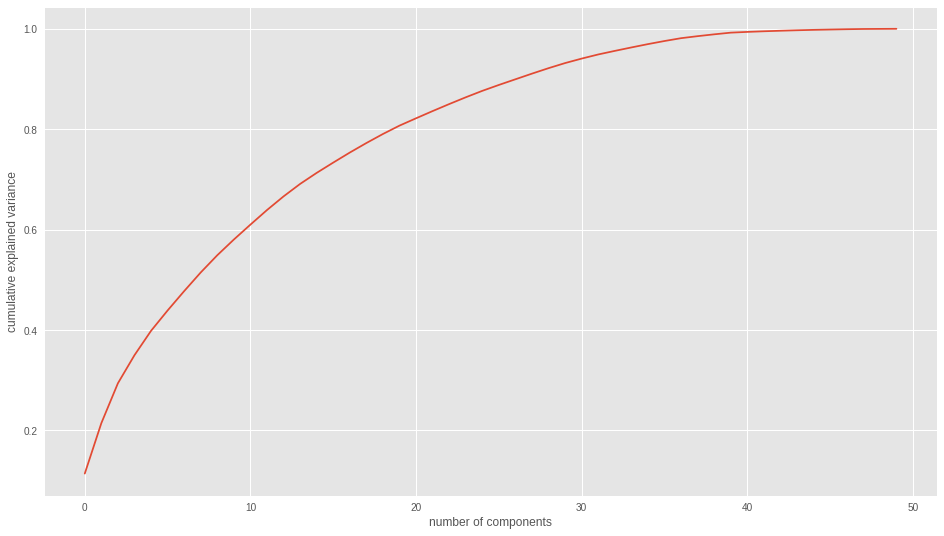

In [87]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [31]:
X.shape


(52810, 50)

In [32]:
pca = PCA(2)  # project from 50 to 2 dimensions
projected = pca.fit_transform(X)

In [88]:
pca3 = PCA(3)  # project from 50 to 3 dimensions
projected3 = pca3.fit_transform(X)

In [90]:
pca4 = PCA(4)  # project from 50 to 4 dimensions
projected4 = pca4.fit_transform(X)

In [91]:
pca5 = PCA(5)  # project from 50 to 5 dimensions
projected5 = pca5.fit_transform(X)

In [92]:
pca10 = PCA(10)  # project from 50 to 10 dimensions
projected10 = pca10.fit_transform(X)

In [93]:
pca20 = PCA(20)  # project from 50 to 20 dimensions
projected20 = pca20.fit_transform(X)

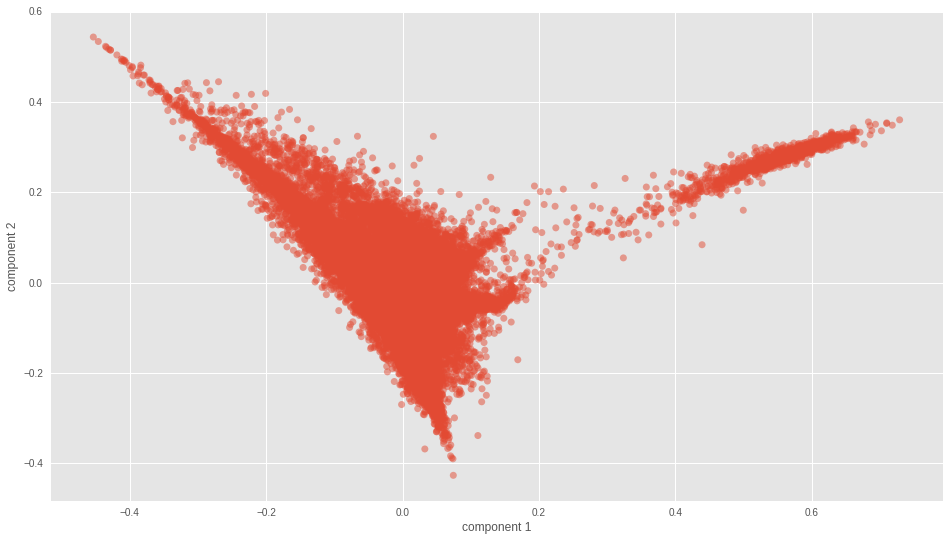

In [33]:
plt.scatter(projected[:, 0], projected[:, 1],
         edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [34]:
projected[1]

array([ 0.02718143, -0.16791745])

In [35]:
projected_df = pd.DataFrame(projected)

In [36]:
projected_df.shape

(52810, 2)

In [37]:
lda_std = stats.zscore(lda_read[clmns])

In [38]:
lda_std.shape

(52810, 50)

In [74]:
X = lda_std

In [75]:
len(X)

52810

In [76]:
X = X[:20000]

In [77]:
len(X)

20000

In [78]:
range_n_clusters = [2, 3, 4, 5, 6, 10]

For n_clusters = 2 The average silhouette_score is : 0.1819326672279445


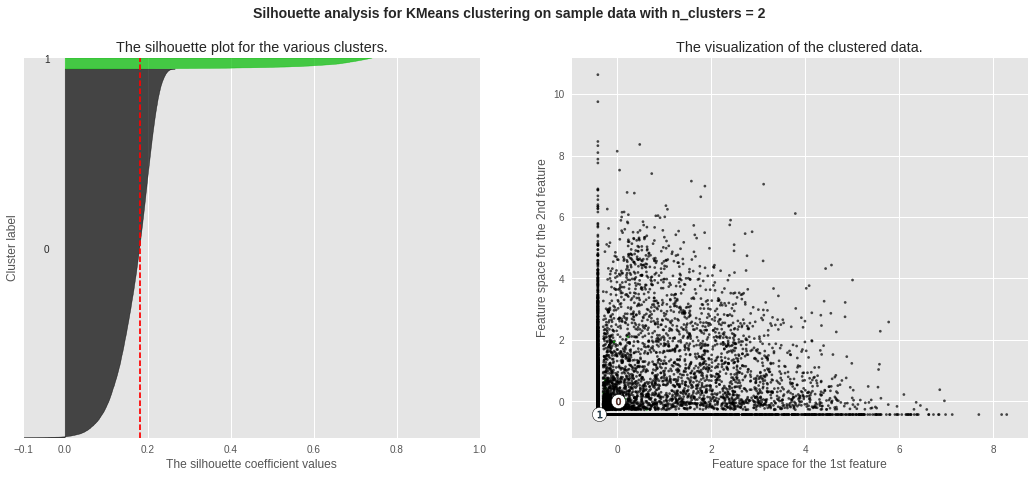

For n_clusters = 3 The average silhouette_score is : 0.042006708287210495


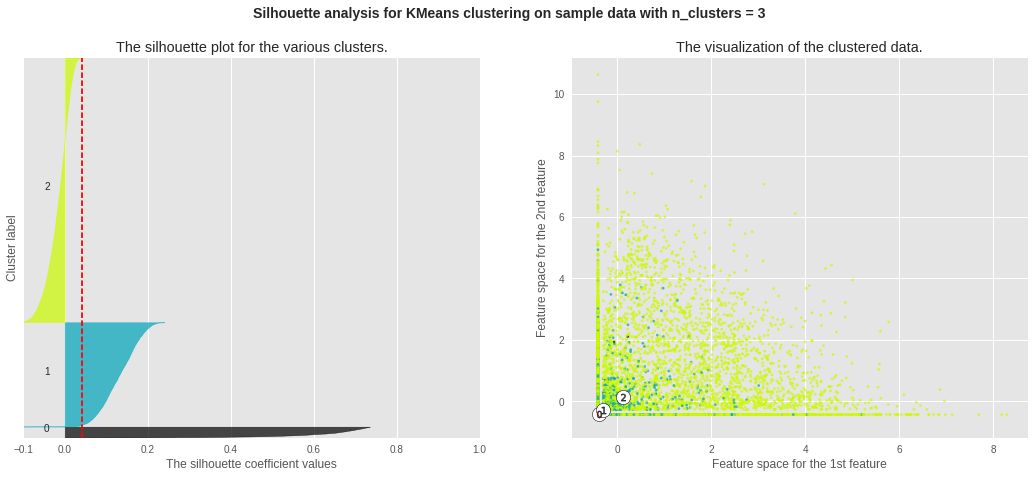

For n_clusters = 4 The average silhouette_score is : 0.04825494351501721


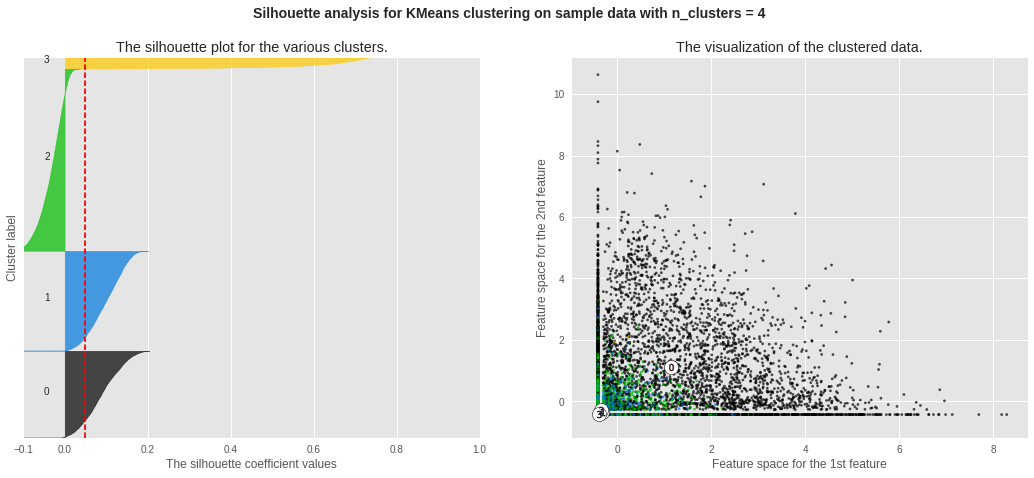

For n_clusters = 5 The average silhouette_score is : 0.058201372749976665


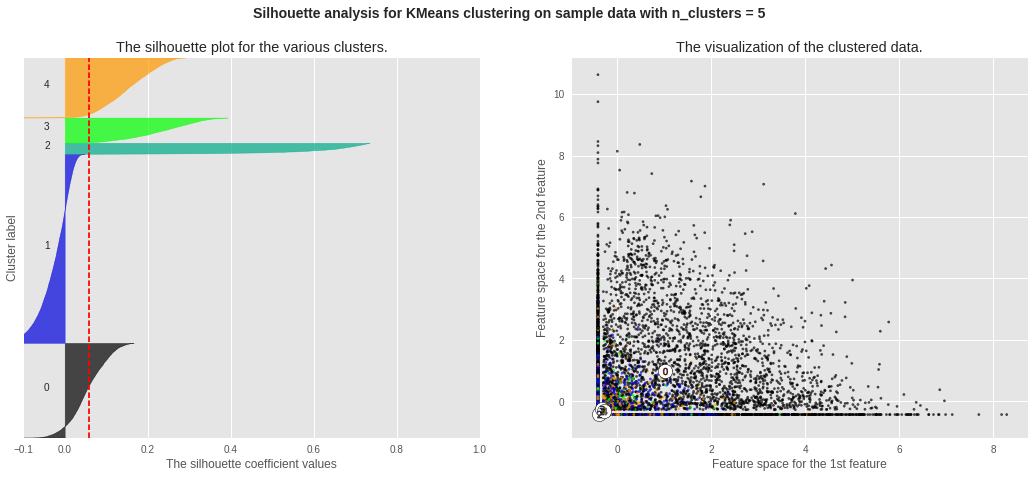

For n_clusters = 6 The average silhouette_score is : 0.06064023985627191


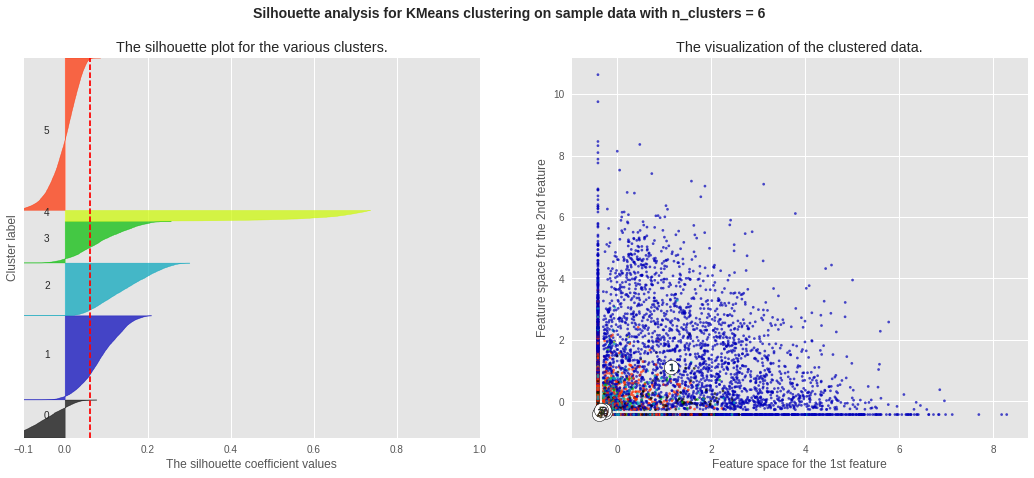

For n_clusters = 10 The average silhouette_score is : 0.09365215515591316


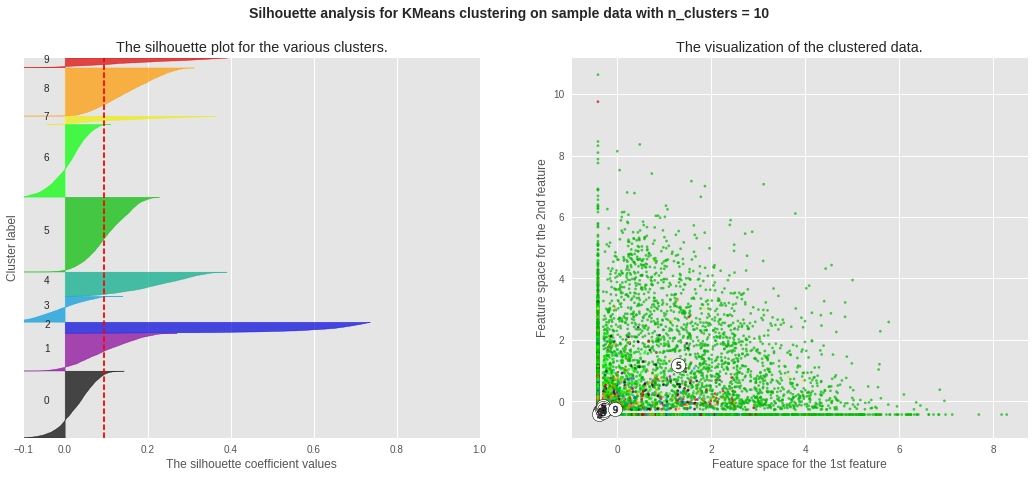

In [79]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [80]:
X = projected_df.as_matrix()

In [81]:
X = X[:20000]

In [82]:
len(X)

20000

In [83]:
X[1]

array([ 0.02718143, -0.16791745])

For n_clusters = 2 The average silhouette_score is : 0.8049455680146713


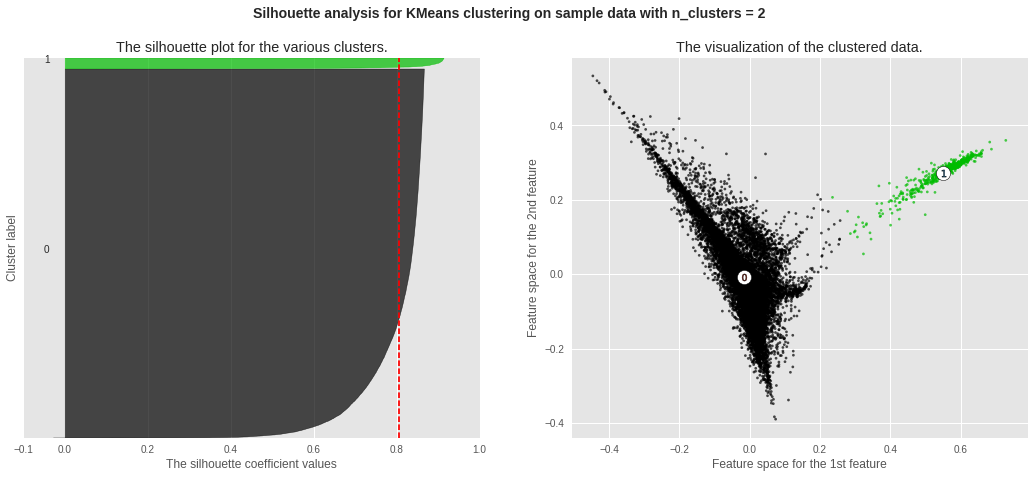

For n_clusters = 3 The average silhouette_score is : 0.5646571258102683


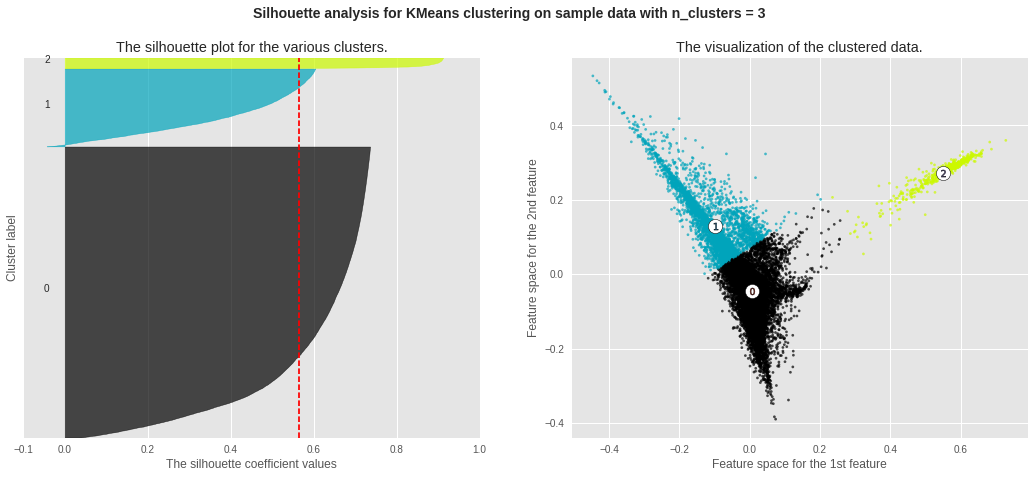

For n_clusters = 4 The average silhouette_score is : 0.4252079704771255


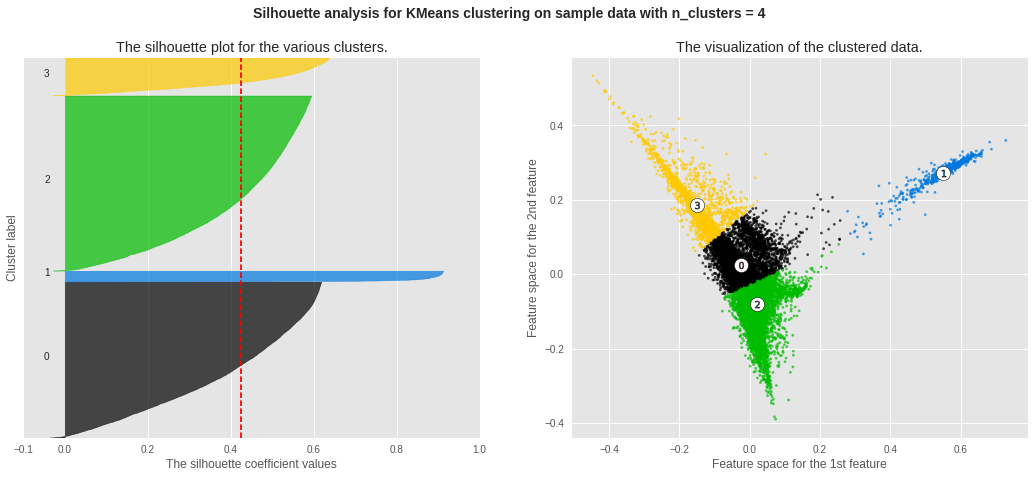

For n_clusters = 5 The average silhouette_score is : 0.44429580421940257


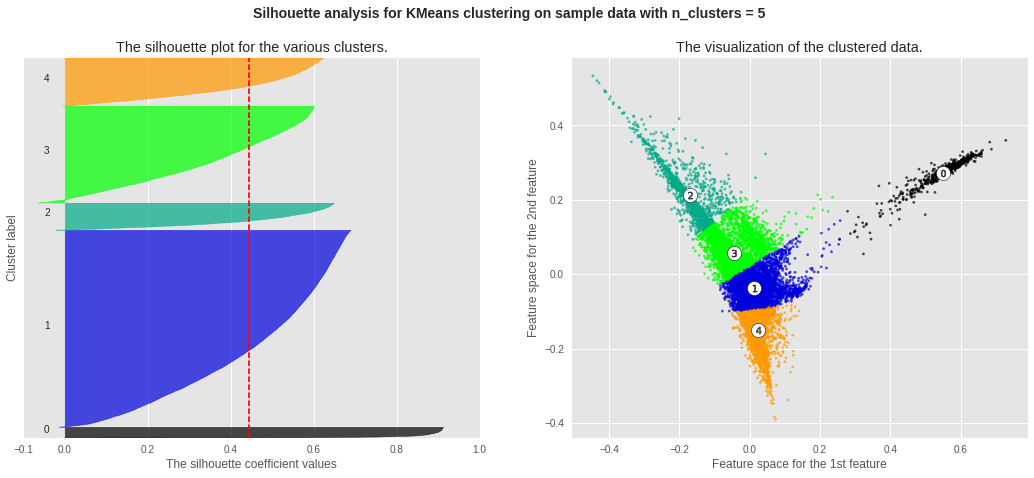

For n_clusters = 6 The average silhouette_score is : 0.41589745126808086


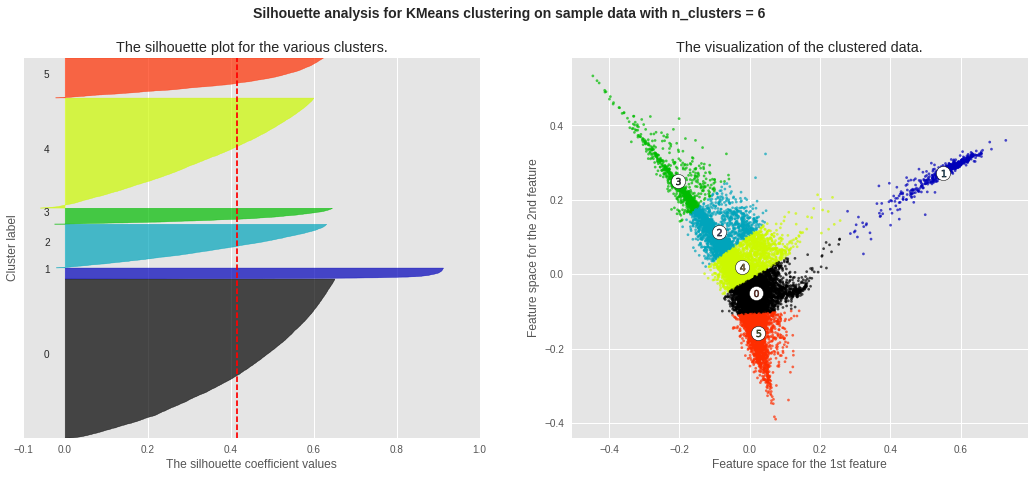

For n_clusters = 10 The average silhouette_score is : 0.39525044844640733


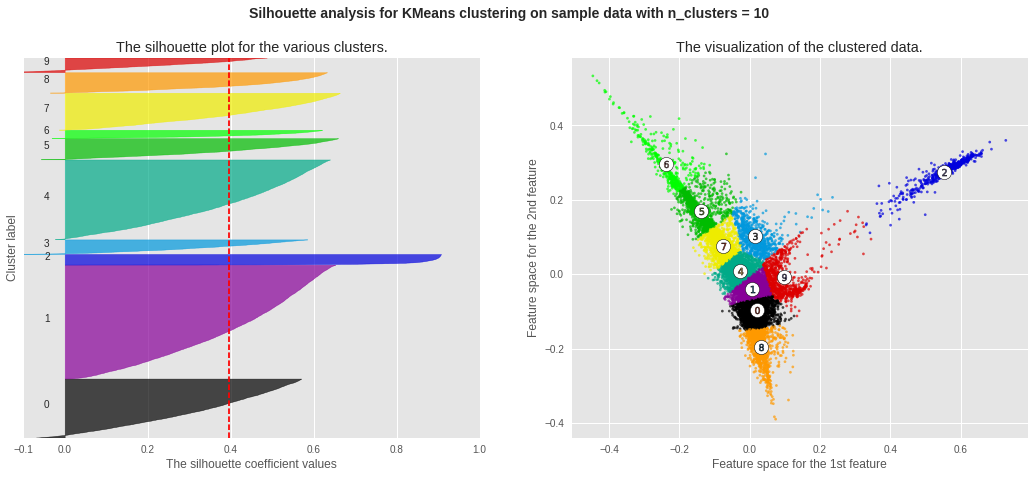

In [84]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [94]:
X = projected3
X = X[:20000]
len(X)

20000

For n_clusters = 2 The average silhouette_score is : 0.7434668948662544


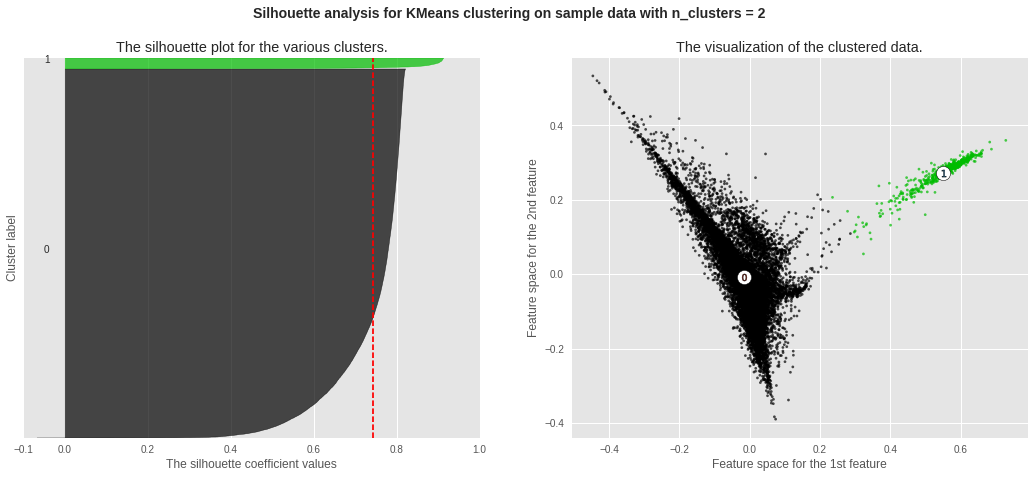

For n_clusters = 3 The average silhouette_score is : 0.522971206963233


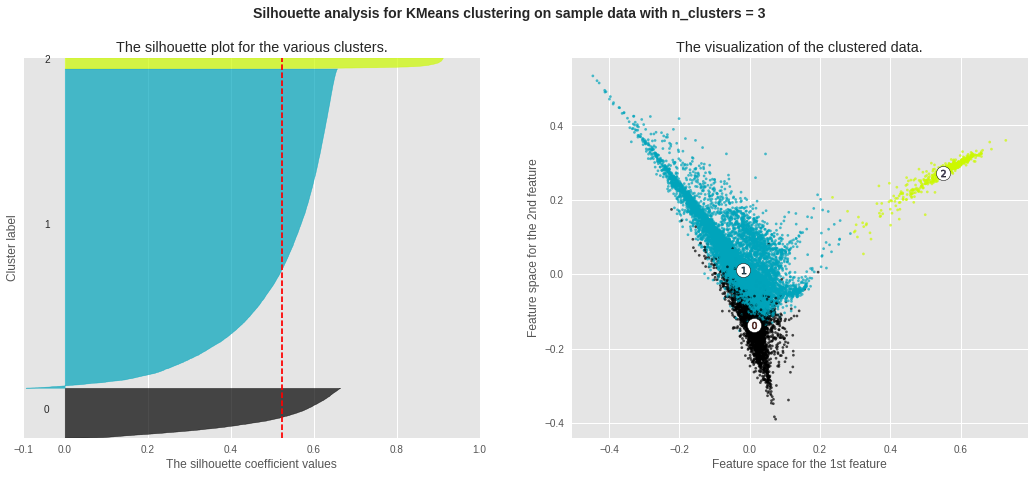

For n_clusters = 4 The average silhouette_score is : 0.547265673903126


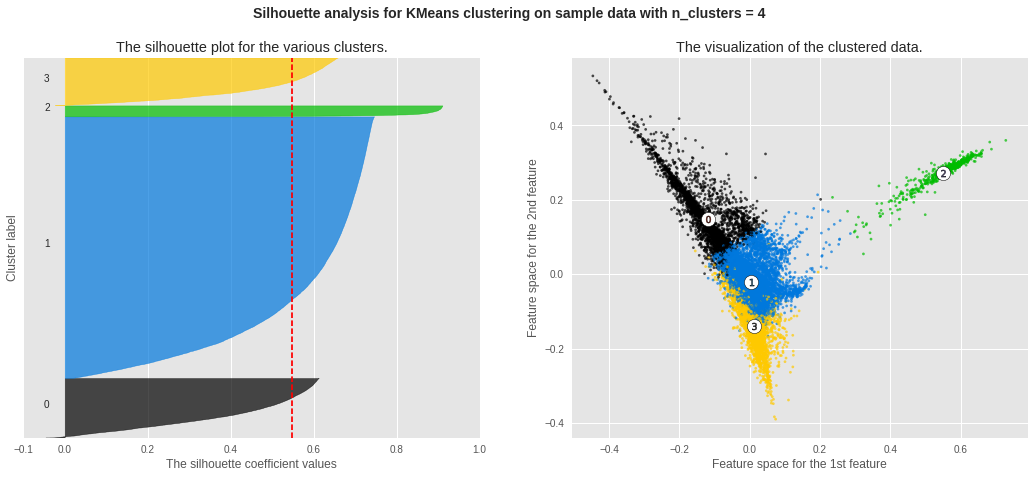

For n_clusters = 5 The average silhouette_score is : 0.4342677866629738


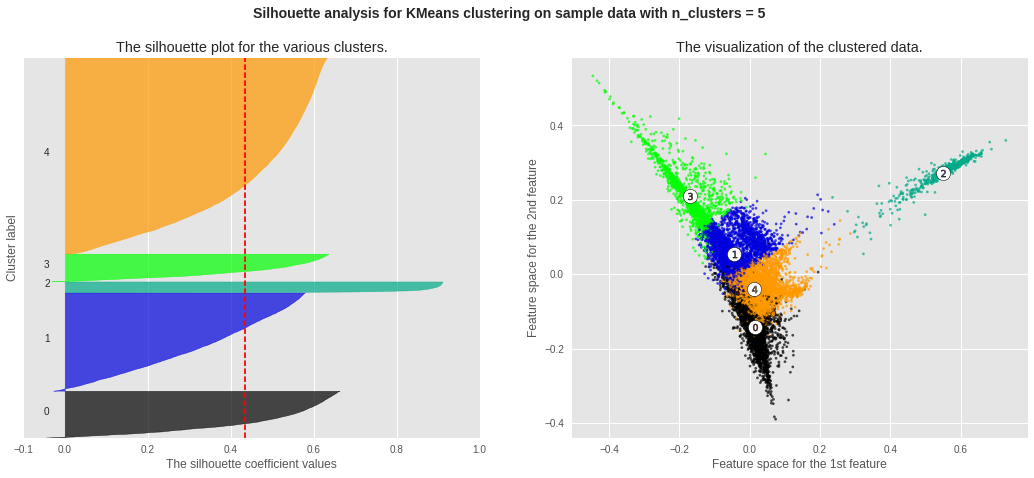

For n_clusters = 6 The average silhouette_score is : 0.42813685870343104


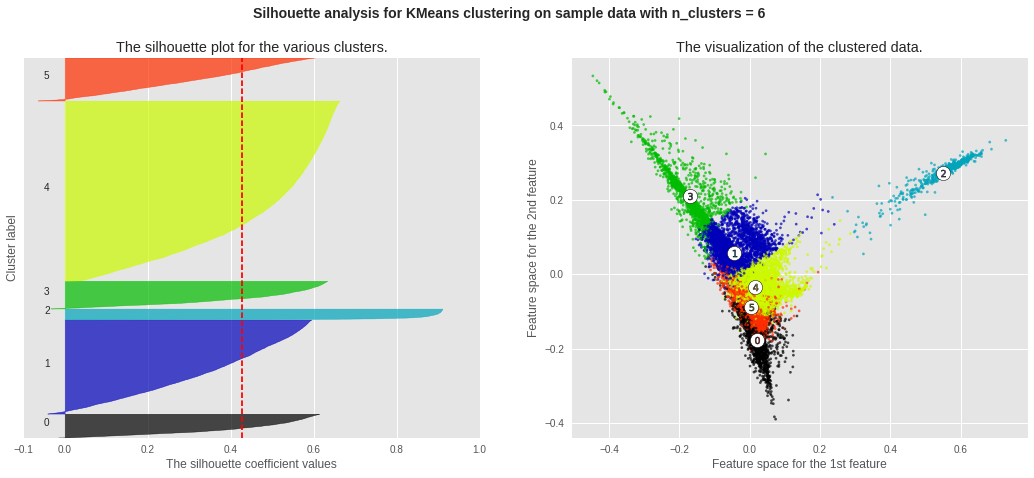

For n_clusters = 10 The average silhouette_score is : 0.3424270151060389


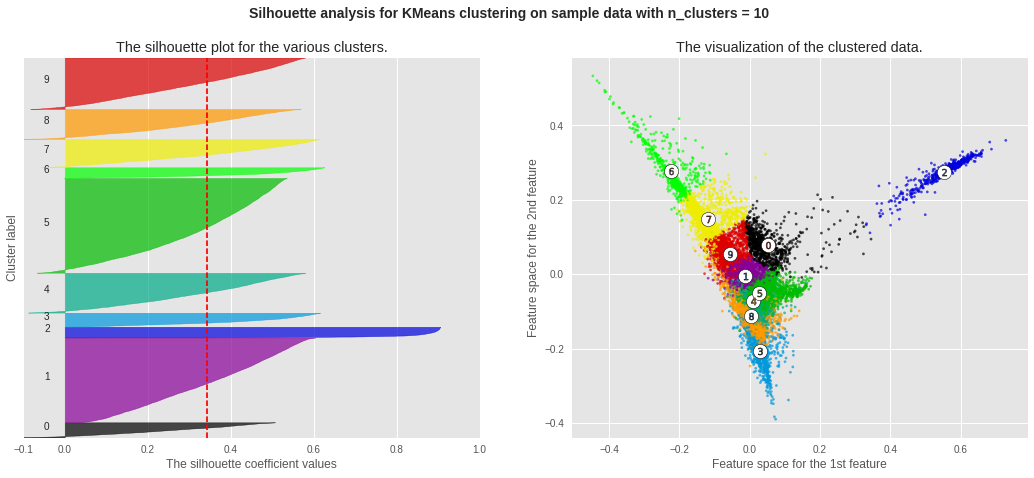

In [95]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    

In [96]:
X = projected4
X = X[:20000]
len(X)

20000

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6965506238579392


In [ ]:
X = projected5
X = X[:20000]
len(X)

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
X = projected10
X = X[:20000]
len(X)

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
X = projected20
X = X[:20000]
len(X)

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [136]:
#Cluster with kmeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(lda_std)
labels = kmeans.labels_

In [137]:
#Glue back to originaal data
lda_read['clusters'] = labels

In [138]:
#Add the column into our list
clmns.extend(['clusters'])

In [139]:
#Lets analyze the clusters
print(lda_read[clmns].groupby(['clusters']).mean())

           chinese      thai   healthy     smell  japanese   toronto  \
clusters                                                               
0         0.008356  0.007978  0.022937  0.004811  0.003115  0.003957   
1         0.007234  0.006126  0.006343  0.003073  0.004535  0.002908   
2         0.005641  0.010331  0.010530  0.003928  0.001985  0.003870   
3         0.140395  0.100785  0.014770  0.002509  0.048658  0.003876   
4         0.002197  0.002448  0.003448  0.000607  0.001678  0.003214   

           service  experience  asian soup   grocery    ...         deli  \
clusters                                                ...                
0         0.030756    0.020018    0.002788  0.046288    ...     0.047771   
1         0.091377    0.043669    0.000845  0.008534    ...     0.006559   
2         0.050610    0.016756    0.001100  0.019755    ...     0.015142   
3         0.065552    0.023969    0.003021  0.013753    ...     0.002779   
4         0.003848    0.001901    0.002

In [140]:
lda_read.columns

Index(['business_id', 'chinese', 'thai', 'healthy', 'smell', 'japanese',
       'toronto', 'service', 'experience', 'asian soup', 'grocery', 'parking',
       'bar ambiance', 'uk', 'good service', 'fun ambiance', 'young',
       'comfort food', 'greek', 'high end', 'hotwing', 'breakfast', 'sweet',
       'wine & dine', 'pubs', 'good taste', 'na drinks', 'desserts',
       'coffee shop', 'mexican', 'reviews', 'new york', 'general restaurant',
       'beach', 'location', 'happy hour', 'amazing', 'vietnamese', 'time',
       'vas legas', 'montreal', 'deli', 'buffet', 'bbq', 'french', 'money',
       'street taco', 'pizza', 'airport & delivery', 'burger & fries',
       'italian', 'clusters'],
      dtype='object')